kt_wiz에서 활약을 하고있는 황재균 선수의 21년도 타점 예측하기</br>
data set은 황재균의 07년도부터 21년도까지의 데이터</br>
train data는 1585 행까지(07년~20년도), test data는 끝까지(21년도, 44경기)</br>
독립변수 X는 상대, 타율, 타석, 안타, 2루타, 3루타, 홈런으로 7개의 feature</br>
타겟 y는 타점

In [ ]:
!python --version

Python 3.7.10


In [ ]:
import pandas as pd
import numpy as np

# 랜덤 시드 고정시키기
np.random.seed(5)

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu
from keras.optimizers import Adam


In [ ]:
df = pd.read_csv('/content/Hwang_07_21_data.txt', sep='\t')
df.tail()

,4월,상대,타율,타격,타석,득점,안타,2루타,3루타,홈런,타점,도루,도루실패,볼넷,사구,삼진,병살타,AVG2
1623,6.27,한화,0.500,4,4,2,2,0,0,1,4,0,0,0,0,2,0,0.309
1624,6.30,LG,0.500,4,4,1,2,0,0,0,1,0,1,0,0,0,0,0.314
1625,7.01,LG,0.000,5,5,1,0,0,0,0,0,0,0,0,0,2,0,0.304
1626,7.02,키움,0.500,4,4,2,2,0,0,0,0,0,0,0,0,0,0,0.309
1627,7.04,키움,0.400,5,5,2,2,0,0,0,3,0,0,0,0,0,0,0.312


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   4월      1628 non-null   float64
 1   상대      1628 non-null   object 
 2   타율      1628 non-null   object 
 3   타격      1628 non-null   int64  
 4   타석      1628 non-null   int64  
 5   득점      1628 non-null   int64  
 6   안타      1628 non-null   int64  
 7   2루타     1628 non-null   int64  
 8   3루타     1628 non-null   int64  
 9   홈런      1628 non-null   int64  
 10  타점      1628 non-null   int64  
 11  도루      1628 non-null   int64  
 12  도루실패    1628 non-null   int64  
 13  볼넷      1628 non-null   int64  
 14  사구      1628 non-null   int64  
 15  삼진      1628 non-null   int64  
 16  병살타     1628 non-null   int64  
 17  AVG2    1628 non-null   float64
dtypes: float64(2), int64(14), object(2)
memory usage: 229.1+ KB


In [ ]:
df = df.replace('-', np.nan)
# 타석에도 못섰을 때 '-' 표시가 있음
# 어차피 없는 경기라 치고 dropna로 삭제하기

df.head()

,4월,상대,타율,타격,타석,득점,안타,2루타,3루타,홈런,타점,도루,도루실패,볼넷,사구,삼진,병살타,AVG2
0,4.19,두산,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
1,4.21,롯데,0.000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000
2,4.22,롯데,0.000,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0.000
3,4.26,두산,1.000,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0.333
4,5.01,LG,0.000,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0.250


In [ ]:
df = df.dropna()

# 약 40여개의 데이터가 삭제 된 것을 확인할 수 있음

In [ ]:
df = df.drop(['4월', '타격', '득점', '도루', '도루실패', '볼넷', '사구', '삼진', '병살타', 'AVG2'], axis=1)

In [ ]:
df

,상대,타율,타석,안타,2루타,3루타,홈런,타점
1,롯데,0.000,1,0,0,0,0,0
2,롯데,0.000,1,0,0,0,0,0
3,두산,1.000,1,1,0,0,0,0
4,LG,0.000,1,0,0,0,0,0
7,SK,0.500,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...
1623,한화,0.500,4,2,0,0,1,4
1624,LG,0.500,4,2,0,0,0,1
1625,LG,0.000,5,0,0,0,0,0
1626,키움,0.500,4,2,0,0,0,0


'상대' 컬럼 onehot encoding하기

In [ ]:
# 결측값을 제외하고 0과 1로 구성된 더미 값을 만든다.
onehot = pd.get_dummies(df['상대'])
onehot

,KIA,KT,LG,NC,SK,SSG,넥센,두산,롯데,삼성,키움,한화
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1623,0,0,0,0,0,0,0,0,0,0,0,1
1624,0,0,1,0,0,0,0,0,0,0,0,0
1625,0,0,1,0,0,0,0,0,0,0,0,0
1626,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# pd.concat 함수를 사용하여 데이터프레임을 합쳐준다.
# pd.concat( , axis =1) 로 열을 합칠 때는 axis=1을 꼭 적어준다.

merged_df = pd.concat([df, onehot], axis = 1)
merged_df

,상대,타율,타석,안타,2루타,3루타,홈런,타점,KIA,KT,LG,NC,SK,SSG,넥센,두산,롯데,삼성,키움,한화
1,롯데,0.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,롯데,0.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,두산,1.000,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,LG,0.000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,SK,0.500,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,한화,0.500,4,2,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,1
1624,LG,0.500,4,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1625,LG,0.000,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1626,키움,0.500,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# 기존 컬럼 삭제하기
merged_df.drop(['상대'], axis=1, inplace=True)
merged_df

,타율,타석,안타,2루타,3루타,홈런,타점,KIA,KT,LG,NC,SK,SSG,넥센,두산,롯데,삼성,키움,한화
1,0.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1.000,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0.500,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,0.500,4,2,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,1
1624,0.500,4,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1625,0.000,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1626,0.500,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591 entries, 1 to 1627
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   타율      1591 non-null   object
 1   타석      1591 non-null   int64 
 2   안타      1591 non-null   int64 
 3   2루타     1591 non-null   int64 
 4   3루타     1591 non-null   int64 
 5   홈런      1591 non-null   int64 
 6   타점      1591 non-null   int64 
 7   KIA     1591 non-null   uint8 
 8   KT      1591 non-null   uint8 
 9   LG      1591 non-null   uint8 
 10  NC      1591 non-null   uint8 
 11  SK      1591 non-null   uint8 
 12  SSG     1591 non-null   uint8 
 13  넥센      1591 non-null   uint8 
 14  두산      1591 non-null   uint8 
 15  롯데      1591 non-null   uint8 
 16  삼성      1591 non-null   uint8 
 17  키움      1591 non-null   uint8 
 18  한화      1591 non-null   uint8 
dtypes: int64(6), object(1), uint8(12)
memory usage: 118.1+ KB


In [ ]:
# train, test로 나누기 쉽도록 컬럼의 위치를 변경해준다.
merged_df = merged_df[['타율',
                       '타석',
                       '안타',
                       '2루타',
                       '3루타',
                       '홈런',
                       'KIA',
                       'KT',
                       'LG',
                       'NC', 
                       'SK',
                       'SSG', 
                       '넥센',
                       '두산', 
                       '롯데',
                       '삼성',
                       '키움', 
                       '한화',
                       '타점']]
merged_df

,타율,타석,안타,2루타,3루타,홈런,KIA,KT,LG,NC,SK,SSG,넥센,두산,롯데,삼성,키움,한화,타점
1,0.000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.000,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0.500,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,0.500,4,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4
1624,0.500,4,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1625,0.000,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1626,0.500,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# 데이터 셋이 전부 숫자이므로 numpy로 np.array로 바꿔준다.
Hwang_data = np.array(merged_df)
type(Hwang_data)

numpy.ndarray

## 데이터 셋 생성하기

In [ ]:
# 학습 데이터 만들기
# X_train에 학습 데이터에 1547개와 18개 변수
X_train = Hwang_data[:1547, 0:18].astype('float')
print(X_train.shape)

# y_train에 학습 데이터 1547개와 1개 타겟
y_train = Hwang_data[:1547, 18].astype('float')
print(y_train.shape)

# X_test 데이터에 44개와 18개 변수
X_test = Hwang_data[1547:, 0:18].astype('float')
print(X_test.shape)

# y_test에 학습 데이터 44개와 1개 타겟
y_test = Hwang_data[1547:, 18].astype('float')
print(y_test.shape)


(1547, 18)
(1547,)
(44, 18)
(44,)


## 모델 구성하기

In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(18,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


## 모델 설정하기

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae', 'mse'])

## 모델 학습하기

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs = 300)

Epoch 1/300
49/49 [==============================] - 14s 2ms/step - loss: 0.7733 - mae: 0.6796 - mse: 0.7733
Epoch 2/300
49/49 [==============================] - 0s 2ms/step - loss: 0.7816 - mae: 0.6337 - mse: 0.7816
Epoch 3/300
49/49 [==============================] - 0s 2ms/step - loss: 0.6378 - mae: 0.5823 - mse: 0.6378
Epoch 4/300
49/49 [==============================] - 0s 2ms/step - loss: 0.7165 - mae: 0.5916 - mse: 0.7165
Epoch 5/300
49/49 [==============================] - 0s 1ms/step - loss: 0.6321 - mae: 0.5686 - mse: 0.6321
Epoch 6/300
49/49 [==============================] - 0s 1ms/step - loss: 0.6654 - mae: 0.5783 - mse: 0.6654
Epoch 7/300
49/49 [==============================] - 0s 2ms/step - loss: 0.5992 - mae: 0.5448 - mse: 0.5992
Epoch 8/300
49/49 [==============================] - 0s 2ms/step - loss: 0.6076 - mae: 0.5547 - mse: 0.6076
Epoch 9/300
49/49 [==============================] - 0s 2ms/step - loss: 0.6444 - mae: 0.5572 - mse: 0.6444
Epoch 10/300
49/49 [=======

모델 그려보기

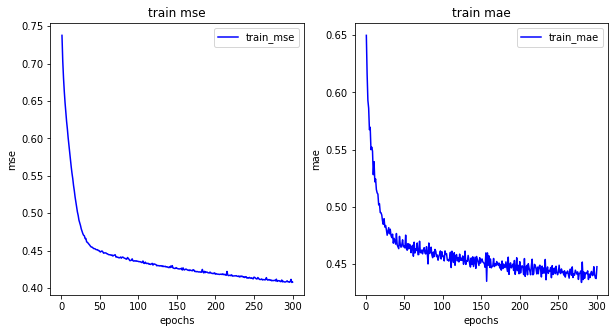

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
# val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
# ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
# val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
# ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()


## 모델 평가하기

In [ ]:
print(model.evaluate(X_test, y_test))

2/2 [==============================] - 1s 6ms/step - loss: 0.6119 - mae: 0.5347 - mse: 0.6119
[0.61185222864151, 0.5346781015396118, 0.61185222864151]


## 모델 예측하기

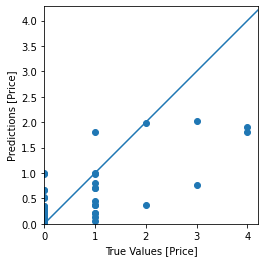

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


타점이 나올 수 있는 최대 경우의 수
- 타자 한 명이 최대로 나올 수 있는 타석이 5타석이라고 가정하고
- 그 타자가 매 타석마다 만루홈런을 때린다고 했을 때 20타점을 얻을 수 있다.
- 0 ~ 20까지를 다중분류로하여 예측을 할 수 있을 것 같다.
- 그래프로 나타낼 때는 스캐터를 이용해서 실제 타점과 예상한 타점을 비교해볼 수 있을 것 같다.
- 회귀로 했을 때 소수점으로도 예측을 하고 예측도 잘 안되는 것 같아서 다중분류로도 한번 해보자